# Ejercicio de machine learning: clasificación vinícola

En este ejercicio (mucho menos guiado que los anteriores) vas a tener dos objetivos. Para ello, utilizarás un dataset sobre distintos vinos con sus características (como pueden ser la acidez, densidad...). Tendrás que generar, entrenar, validar y testear modelos tanto de clasificación como de regresión.

El dataset proviene de la Universdad de Minho, generado por [P. Cortez](http://www3.dsi.uminho.pt/pcortez/Home.html) et al. Dicho dataset se encuentra en el [*UC Irvine Machine Learning Repository*](https://archive.ics.uci.edu/ml/index.html) ([aquí](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) está disponible; pero debes usar la versión adjunta en la misma carpeta que este documento). Adjunto la descripción del dataset:

```
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None
```

Además de las 12 variables descritas, el dataset que utilizarás tiene otra: si el vino es blanco o rojo. Dicho esto, los objetivos son:

1. Separar el dataset en training (+ validación si no vas a hacer validación cruzada) y testing, haciendo antes (o después) las transformaciones de los datos que consideres oportunas, así como selección de variables, reducción de dimensionalidad... Puede que decidas usar los datos tal cual vienen también...
2. Hacer un modelo capaz de clasificar lo mejor posible si un vino es blanco o rojo a partir del resto de variables (vas a ver que está chupado conseguir un muy buen resultado).
3. Hacer un modelo regresor que prediga lo mejor posible la calidad de los vinos.

El fichero csv a utilizar `winequality.csv` tiene las cabeceras de cuál es cada variable, y los datos están separados por punto y coma.

Siéntete libre de hacer todo el análisis exploratorio y estadístico (así como gráficos) que quieras antes de lanzarte a hacer modelos.

Y nada más. ¡Ánimo!

# EJERCICIO PRÁCTICO DE CLASIFICACIÓN

## 1. CARGA DE DATOS

Comenzamos importando bibliotecas:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Y configurando las filas que queremos visualizar en pandas dataframes, asi como el estilo que queremos que se use en seaborn para los gráficos

In [3]:
pd.set_option("display.max_rows", 500) 
plt.style.use("ggplot")

Importamos el archivo csv

In [4]:
df = pd.read_csv('winequality.csv', sep=';')

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,white
6493,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,white
6494,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,white
6495,7.00,0.24,0.36,4.9,0.083,10.0,133.0,0.99420,3.33,0.37,10.8,6,white


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


## 2. EXPLORATORY DATA ANALYSIS

### Valores nulos
Comprobamos si hay valores nulos y vemos que no los hay

In [7]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

Series([], dtype: int64)


### Resumen estadístico

In [8]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


### Boxplots
Con el objetivo de visualizar los boxplots adecuadamente( ya que el orden de magnitud de las variables de cada feature es diferente), creamos tres grupos para hacer tres gráficos de diagrama de caja y bigotes diferentes. Descartamos la idea de normalizar o estandarizar las variables debido a que,  al no haber separado aun los datos en train y test, estaríamos violando el principio de los datos del cojunto de test.
Por la misma razón, no realizaremos ninguna otra acción, como puede ser descartar outliers o estandarizar features.

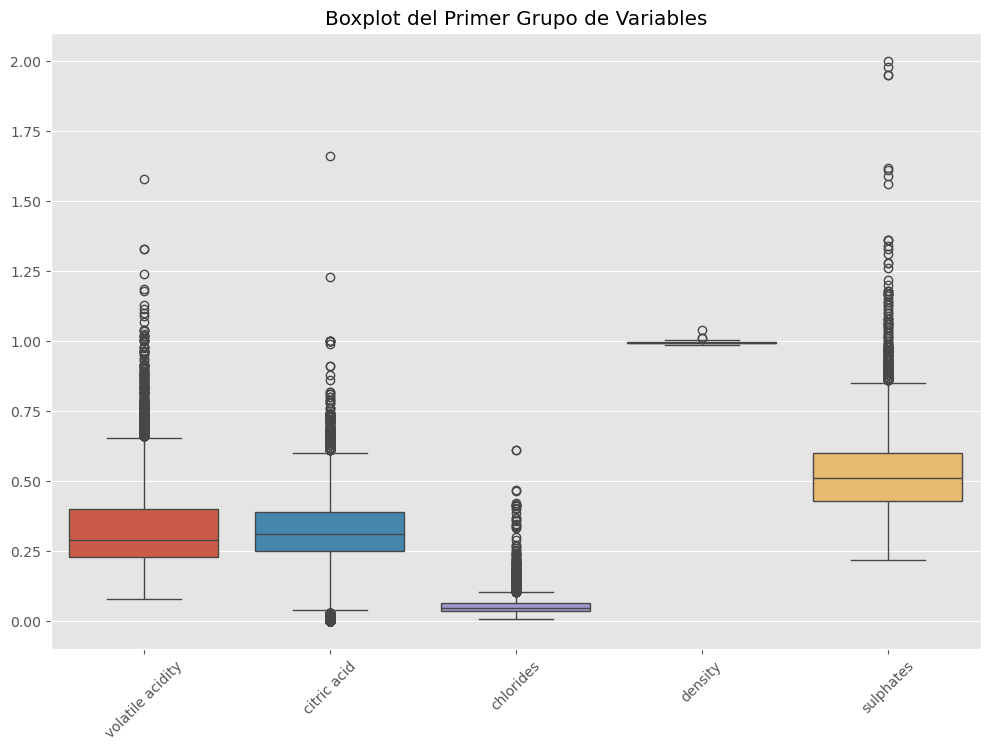

In [9]:
grupo1 = ["volatile acidity", "citric acid", "chlorides","density", "sulphates"]
grupo2 = ["fixed acidity","pH","alcohol", "quality"]
grupo3 = ["free sulfur dioxide","total sulfur dioxide"]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[grupo1])
plt.title("Boxplot del Primer Grupo de Variables")
plt.xticks(rotation=45)
plt.show()

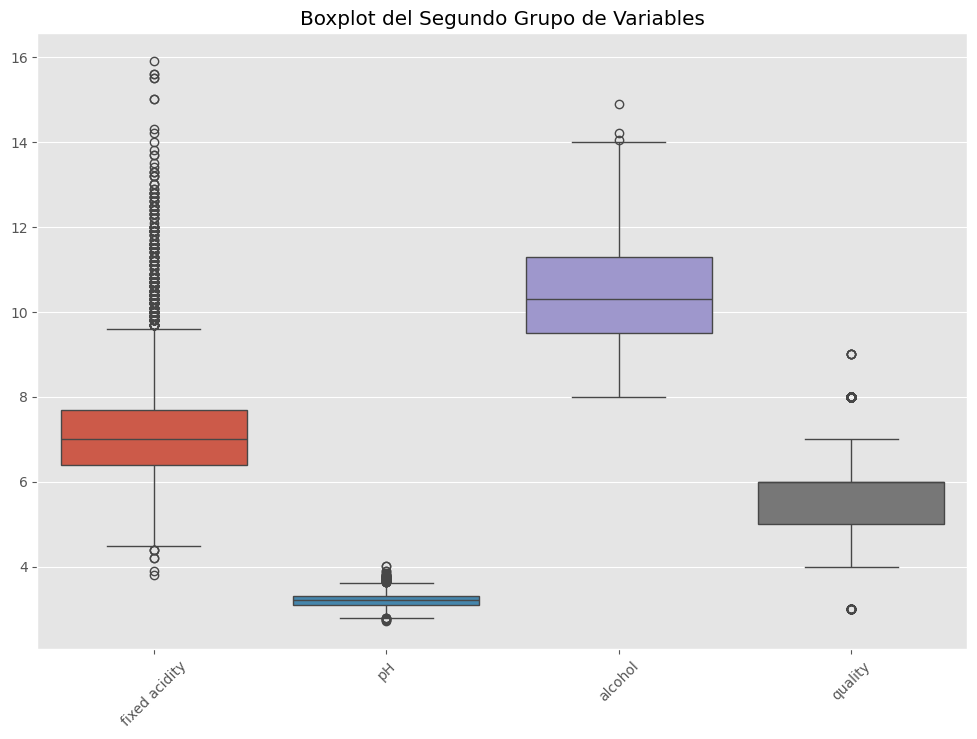

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[grupo2])
plt.title("Boxplot del Segundo Grupo de Variables")
plt.xticks(rotation=45)
plt.show()

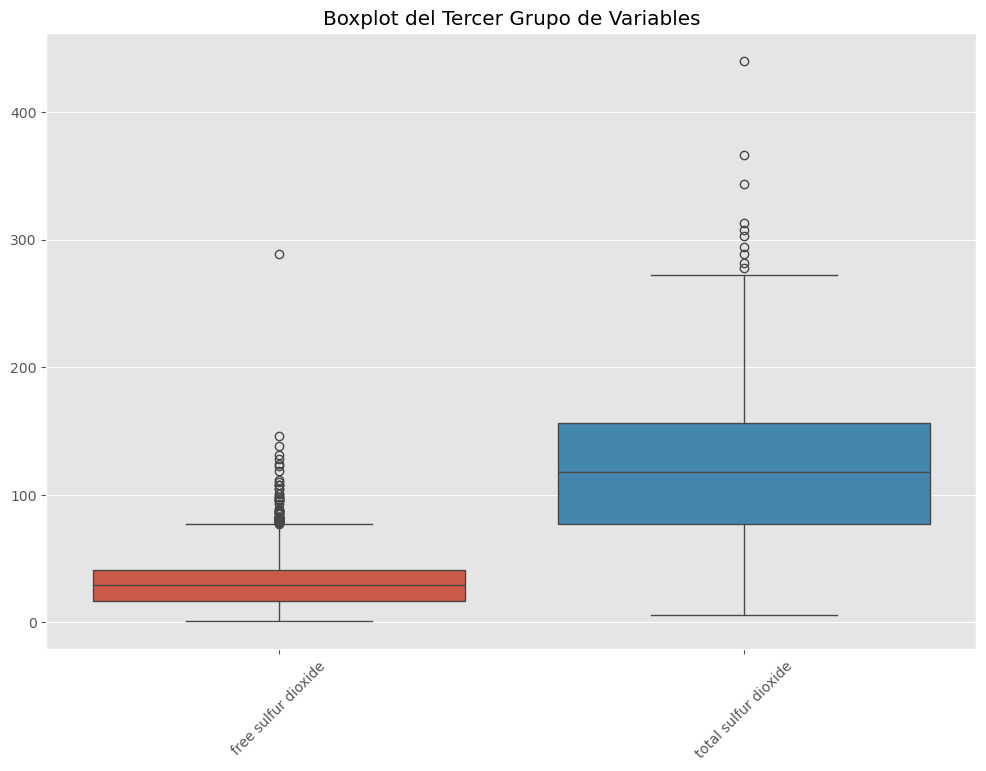

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[grupo3])
plt.title("Boxplot del Tercer Grupo de Variables")
plt.xticks(rotation=45)
plt.show()

### Matriz de correlación
Creamos una matriz de correlación antes de dibujar un pairplot debido a que el pair plot con 12 variables no se va a visualizar correctamente

In [12]:
df_numerico = df.select_dtypes(include=[int, float])

matriz_correlacion = df_numerico.corr()
matriz_correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


### Heatmap 

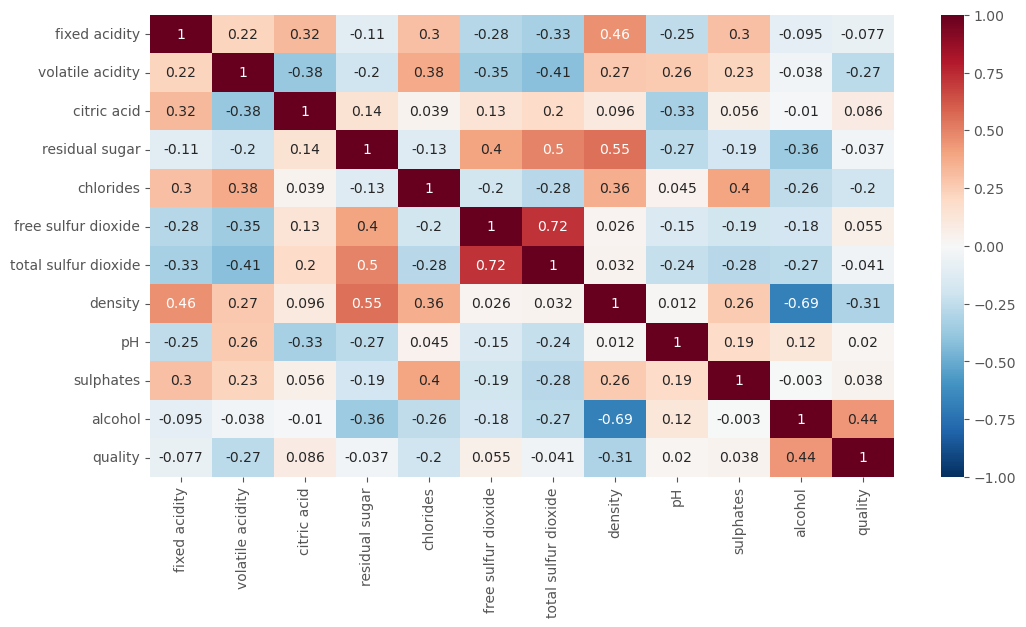

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(matriz_correlacion, 
            vmin=-1.0,
            vmax=1.0,
            center=0.0,
            annot=True,                     
            cmap="RdBu_r") 
plt.show()

Despues de estudiar la matriz de correlación seleccionamos aquellas variables que tiene correlación superior a 0.5 para poder dibujar nuestro pairplot o diagrama de pares un poco mas resumido, con las variables más interesantes.  

**Correlación fuerte** (0.6<x<0.8)
- total sulfur dioxide vs free sulfur dioxide
- alcohol vs density

**Correlación moderada** (0.5<x<0.6)
- total sulfur dioxide vs residual sugar
- density vs residual sugar
- free sulfur dioxide vs residual sugar

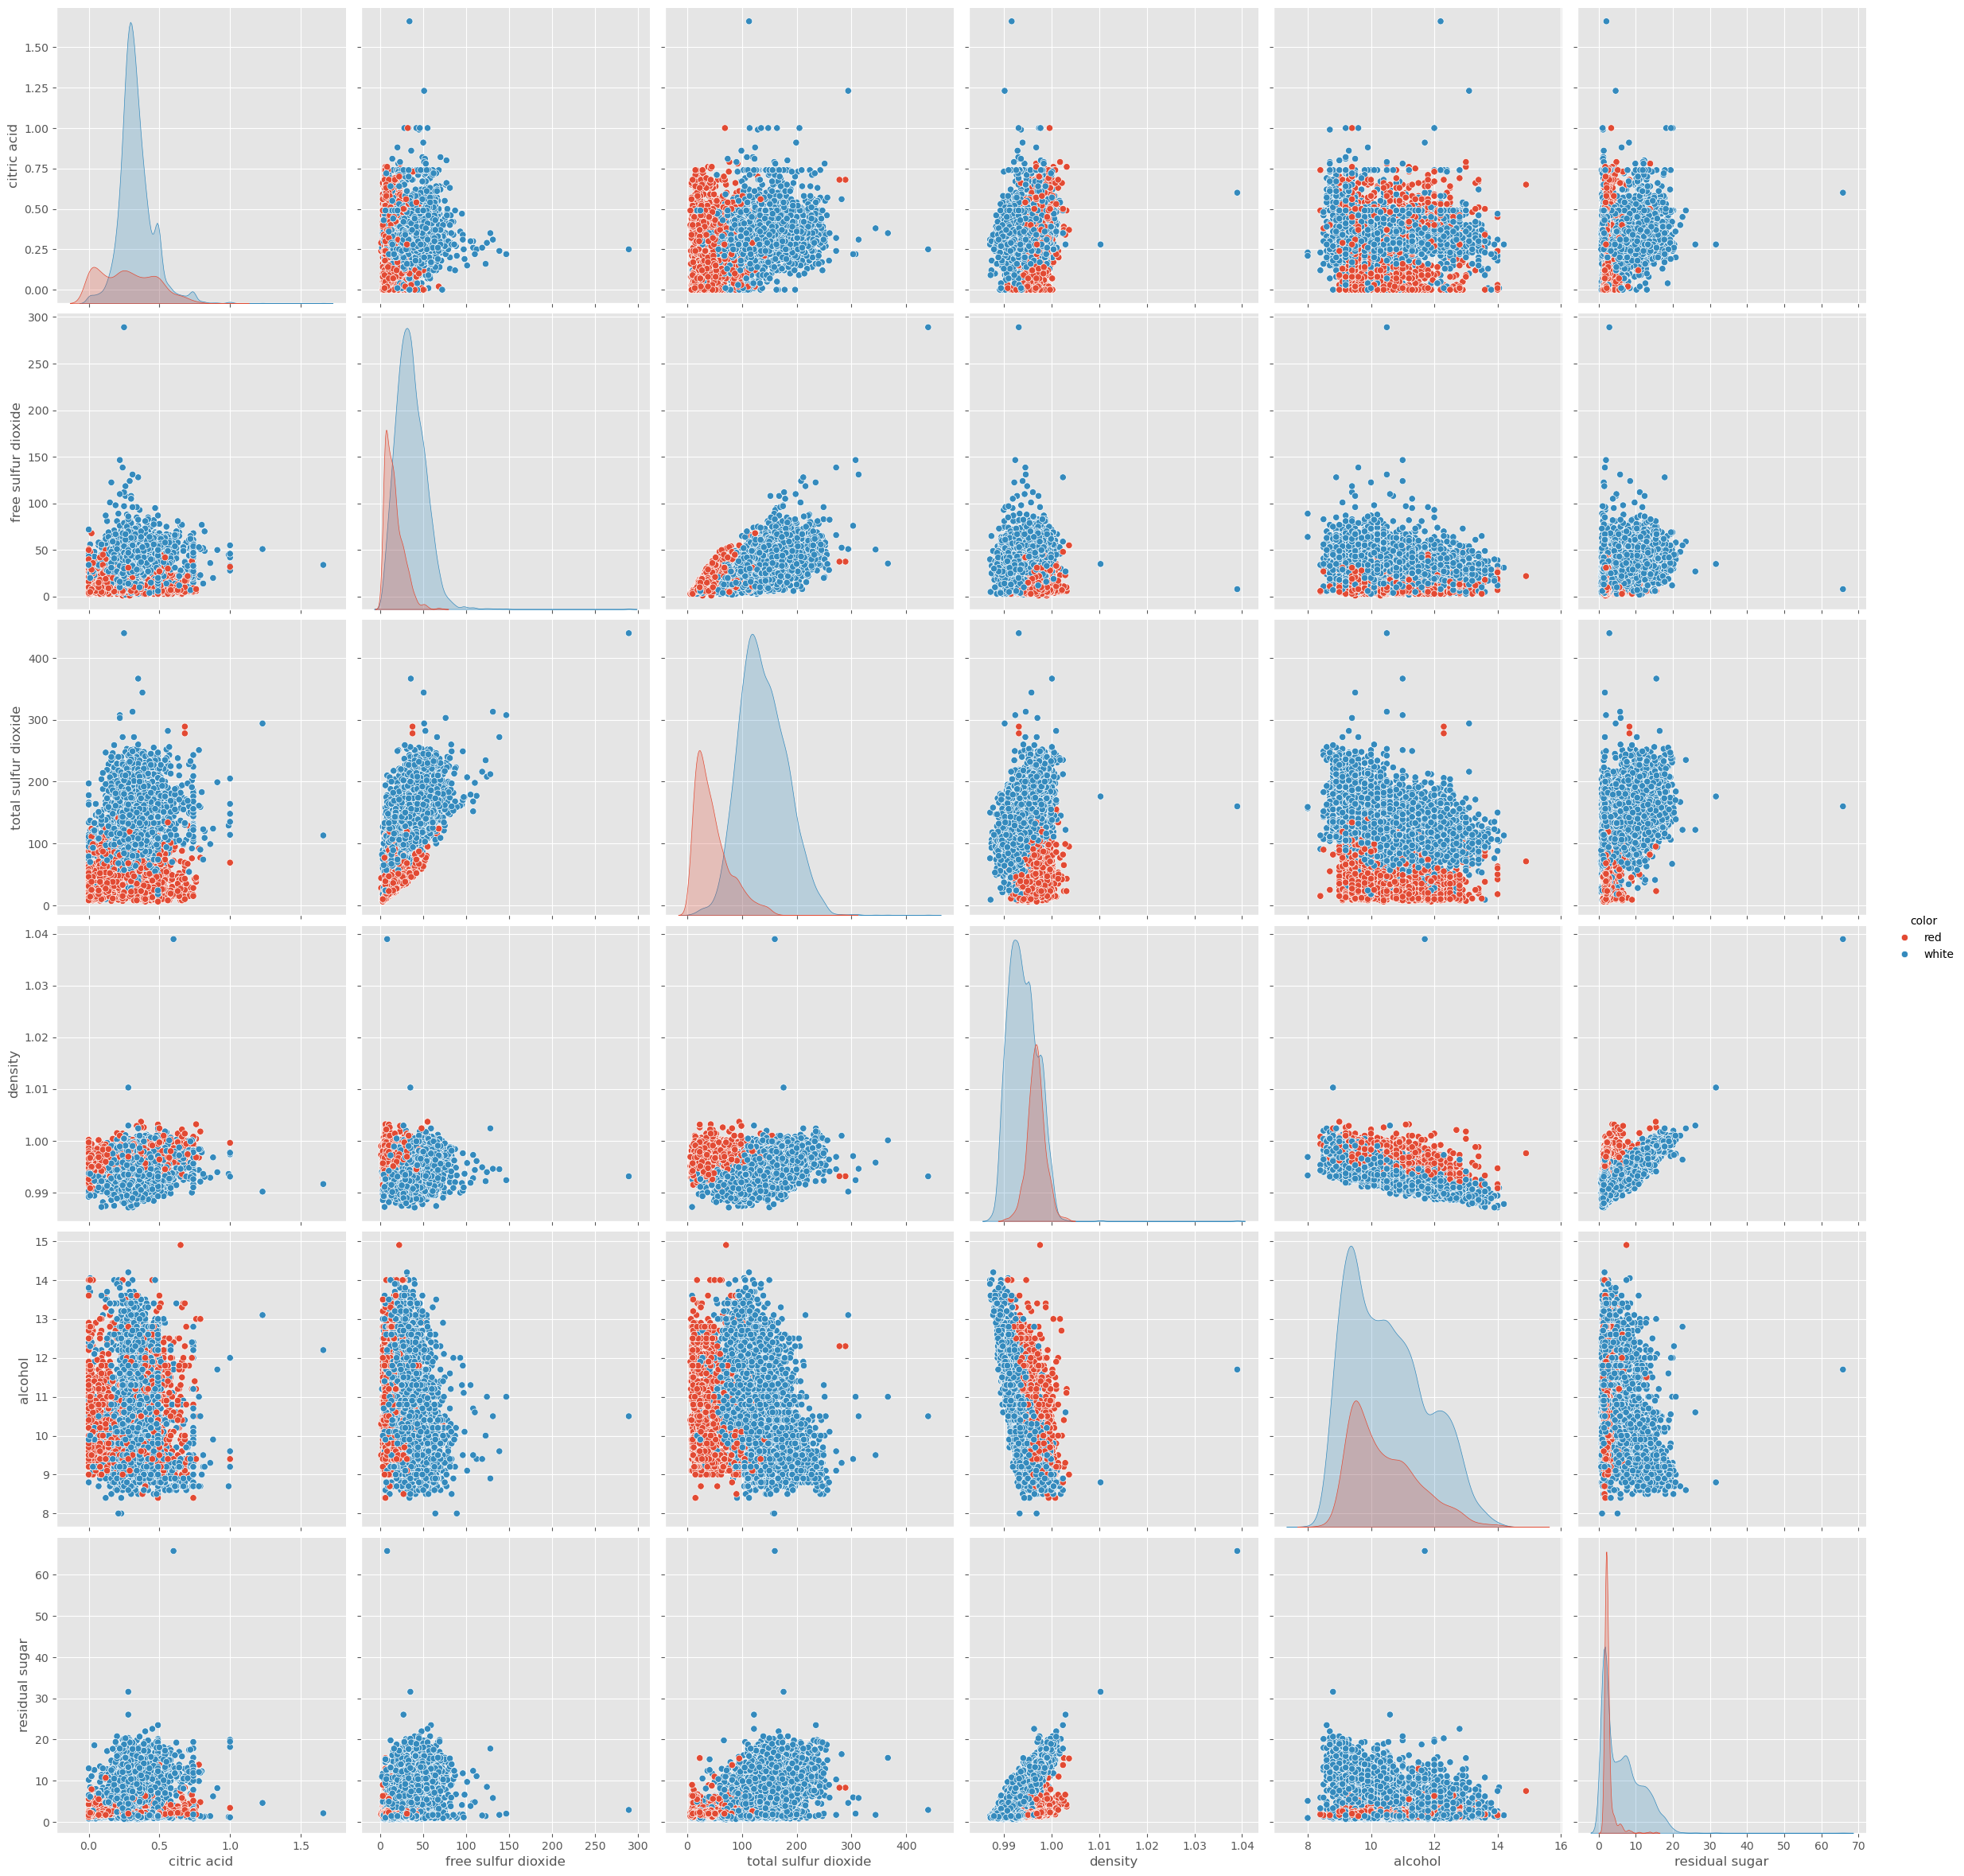

In [14]:
sns.pairplot(df, 
             hue="color",
             vars=["citric acid",
                   "free sulfur dioxide",
                   "total sulfur dioxide",
                   "density",
                   "alcohol",
                   "residual sugar"],
             height=4
            )
plt.show()

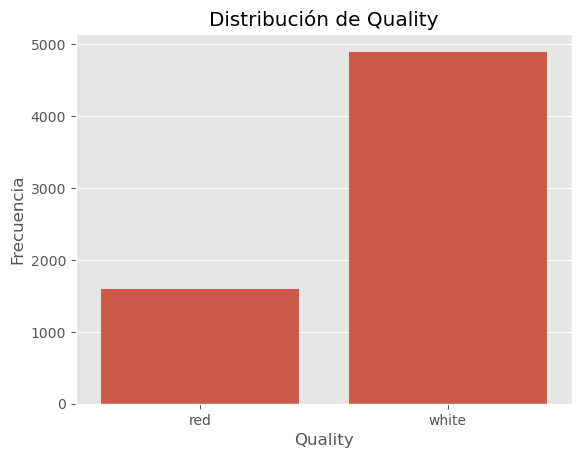

In [15]:
sns.countplot(x=df['color'])
plt.title('Distribución de Quality')
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.show()

La variable objetivo, color, esta desbalanceada. Lo tendremos en cuenta en el análisis de las métricas posterior.

## 3. SEPARACIÓN DE LOS DATOS EN TRAIN Y TEST

### Codificamos la variable categórica "color"
Debido a que las clases a predecir (vino blanco o tinto) vienen dadas en strings, tenemos que convertirlas a números antes de separar nuestro conjunto de datos en train y test. 
Utilizaremos Label encoder de la biblioteca scikit learn para etiquetar nuestra variable "color". 

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df["color"])

df["color"] = label_encoder.transform(df["color"])

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,1
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,1
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,0
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,1
6493,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,1
6494,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,1
6495,7.00,0.24,0.36,4.9,0.083,10.0,133.0,0.99420,3.33,0.37,10.8,6,1


Tras la tranformación veremos que:  
**red wine es ahora 0**  
**white wine es ahora 1**

### Separamos en train y test y reseteamos los índices

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,
                               train_size=0.8,
                               test_size=0.2,
                               random_state=42)

In [18]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [19]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,6.8,0.21,0.31,2.9,0.046,40.0,121.0,0.99130,3.07,0.65,10.9,7,1
1,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.99170,3.12,0.53,11.3,6,1
2,7.4,0.36,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0,5,0
3,6.5,0.29,0.52,7.9,0.049,35.0,192.0,0.99551,3.16,0.51,9.5,6,1
4,7.1,0.21,0.40,1.2,0.069,24.0,156.0,0.99280,3.42,0.43,10.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,7.0,0.14,0.41,0.9,0.037,22.0,95.0,0.99140,3.25,0.43,10.9,6,1
5193,8.4,0.32,0.35,11.7,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,6,1
5194,6.9,0.30,0.21,7.2,0.045,54.0,190.0,0.99595,3.22,0.48,9.4,5,1
5195,7.1,0.31,0.25,11.2,0.048,32.0,136.0,0.99663,3.14,0.40,9.5,5,1


In [20]:
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.6,0.200,0.34,1.8,0.041,42.0,148.0,0.99335,3.35,0.66,11.1,6,1
1,6.7,0.130,0.45,4.2,0.043,52.0,131.0,0.99162,3.06,0.54,11.3,6,1
2,6.4,0.310,0.40,6.4,0.039,39.0,191.0,0.99513,3.14,0.52,9.8,5,1
3,5.1,0.510,0.18,2.1,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,7,0
4,6.7,0.310,0.42,6.4,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,7.2,0.260,0.38,1.5,0.061,12.0,120.0,0.99192,3.18,0.46,10.4,5,1
1296,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5,1
1297,7.2,0.190,0.31,1.4,0.046,37.0,135.0,0.99390,3.34,0.57,10.2,7,1
1298,8.5,0.240,0.39,10.4,0.044,20.0,142.0,0.99740,3.20,0.53,10.0,6,1


### Dividimos train y test en variables dependientes e independientes
Creamos cuatro dataframes, dos para las variables independientes (x) y otros dos para las dependientes (y)

In [21]:
x_train = train.iloc[:, :-1] # TRAIN, VARIABLES INDEPENDIENTES
x_test = test.iloc[:, :-1] # TEST VARIABLES INDEPENDIENTES
y_train=train["color"] #TRAIN, VARIABLE DEPENDIENTE
y_test=test["color"] #TEST, VARIABLE DEPENDIENTE

In [22]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.21,0.31,2.9,0.046,40.0,121.0,0.99130,3.07,0.65,10.9,7
1,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.99170,3.12,0.53,11.3,6
2,7.4,0.36,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0,5
3,6.5,0.29,0.52,7.9,0.049,35.0,192.0,0.99551,3.16,0.51,9.5,6
4,7.1,0.21,0.40,1.2,0.069,24.0,156.0,0.99280,3.42,0.43,10.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
5192,7.0,0.14,0.41,0.9,0.037,22.0,95.0,0.99140,3.25,0.43,10.9,6
5193,8.4,0.32,0.35,11.7,0.029,3.0,46.0,0.99439,3.02,0.34,11.8,6
5194,6.9,0.30,0.21,7.2,0.045,54.0,190.0,0.99595,3.22,0.48,9.4,5
5195,7.1,0.31,0.25,11.2,0.048,32.0,136.0,0.99663,3.14,0.40,9.5,5


In [23]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.6,0.200,0.34,1.8,0.041,42.0,148.0,0.99335,3.35,0.66,11.1,6
1,6.7,0.130,0.45,4.2,0.043,52.0,131.0,0.99162,3.06,0.54,11.3,6
2,6.4,0.310,0.40,6.4,0.039,39.0,191.0,0.99513,3.14,0.52,9.8,5
3,5.1,0.510,0.18,2.1,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,7
4,6.7,0.310,0.42,6.4,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,7.2,0.260,0.38,1.5,0.061,12.0,120.0,0.99192,3.18,0.46,10.4,5
1296,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,9.2,5
1297,7.2,0.190,0.31,1.4,0.046,37.0,135.0,0.99390,3.34,0.57,10.2,7
1298,8.5,0.240,0.39,10.4,0.044,20.0,142.0,0.99740,3.20,0.53,10.0,6


In [24]:
y_train

0       1
1       1
2       0
3       1
4       1
       ..
5192    1
5193    1
5194    1
5195    1
5196    1
Name: color, Length: 5197, dtype: int32

In [25]:
y_test

0       1
1       1
2       1
3       0
4       1
       ..
1295    1
1296    1
1297    1
1298    1
1299    1
Name: color, Length: 1300, dtype: int32

## 4. CREACIÓN DE PIPELINES

### Importamos los módulos y las funciones necesarias de la biblioteca scikit-learn

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

### Creamos las Pipelines
Como modelo seleccionador usaremos el mismo que luego usaremos más tarde  como clasificadr.   


Creamos Pipelines para todos losmodelos,s excepto para los modelos basados ​​en árboles. Debido a que estos modelos están basados ​​en la distancia y pueden manejar diferentes rangos de características, no es necesario escalarlos  
 
En estas Pipelines, seleccionaremos los pasos previos al Grid Search, que seránestandarizado de featuress y selección de variables. Dependiendo del clasificador, iremos probando diferentes alternativas de seelcción de features (kbest, RFECV o sin selección de features). 

In [28]:
arbol = DecisionTreeClassifier()                 # Los modelos de árboles, sin Pipeline ya que no
                                                 # es necesario ni estandarizar ni seleccionar features
random_forest = RandomForestClassifier()

gradient_boosting = GradientBoostingClassifier()

logreg_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LogisticRegression())),
                               ("logreg",LogisticRegression())    # Para la regresión logística, pro-
                              ]                                   # baremos tanto con kbest como con 
                       )                                          # RFECV para selección de features
                                                                  # Estos modelos, que utilizan el 
logreg_kbest = Pipeline(steps=[("scaler",StandardScaler()),       # gradiente descendente, funcionan 
                               ("kbest",SelectKBest()),           # mejor y convergen más rápido cuando
                               ("logreg",LogisticRegression())    # las características están en la  
                              ]                                   # misma escala.
                       )

neighbors = Pipeline(steps=[
    ("scaler", StandardScaler()),                     # En los modelos k-vecinos,para que las
    ("knn", KNeighborsClassifier())                   # distancias sean representativas y que 
])                                                    # todas las características contribuyan 
                                                      # equitativamente al modelo, es necesario
                                                      # escalar. Probamos un modelo sin selección
neighbors_kbest = Pipeline(steps=[                    # de features y otro con kbest.
    ("scaler", StandardScaler()), 
    ("kbest", SelectKBest()),
    ("knn", KNeighborsClassifier())
])
                                                            # Los modelos SMV utilizan distancias entre 
svm = Pipeline(steps=[("scaler", StandardScaler()),         # puntos de datos, por tanto el escalado de
                      ("svm", SVC(probability=True))])      # de features es fundamental. Probamos un 
                                                            # modelo sin selección de features y otro
                                                            # con kbest.Seleccionamos probability=True
svm_kbest = Pipeline(steps=[("scaler",StandardScaler()),    # para que nos devuelva probabilidades y 
                            ("kbest",SelectKBest()),        # y poder asi calcular las métricas 
                            ("svm",SVC(probability= True))])#a posteriori

nb = GaussianNB()                                       # Los modelos Naive Bayes otorgan pesos 
                                                        # a las características, por lo que la  
nb_kbest = Pipeline(steps=[("kbest",SelectKBest()),     # escala de los datos puede no tener 
                           ("nb",GaussianNB())])        # mucho efecto. Creamos un Naive Bayes
                                                        # sin selección de features y otro con k best
mlp = Pipeline(steps=[("scaler",StandardScaler()),
                      ("mlp",MLPClassifier())          # En cambio,para las redes neuronales, el rendi-
                     ]                                 # miento del modelo mejorara con el escalado de
              )                                        # los datos. 
                                                       # Probamos dos Multi-Layer Perceptron, uno sin 
mlp = Pipeline(steps=[("scaler",StandardScaler()),     # selección de features y otro con kbest
                      ("kbest",SelectKBest()),
                      ("mlp",MLPClassifier())          
                     ]                                 
              )

## 5. SEECCIONAMOS HIPERPARÁMETROS PARA CADA MODELO

In [29]:
grid_arbol = {"max_depth":list(range(1,11)) 
              }

grid_random_forest = {"n_estimators": [150], 
                     "max_depth": [3,5,10,15,20],
                     "max_features": ["sqrt", 3, 4]
                     }

grid_gradient_boosting = {"loss": ["log_loss"], 
                          "learning_rate": [0.05, 0.1, 0.5], 
                          "n_estimators": [20,50,100,200], 
                          "max_depth": [1,2,3,4,5], 
                          "subsample": [1.0, 0.8, 0.5],
                          "max_features": ["sqrt", 3, 4],
                          }

grid_logreg_rfecv = {"rfecv__step": [1], 
                     "rfecv__cv": [5],
                     "logreg__penalty": ["l1","l2"],
                     "logreg__C": [0.1, 0.5, 1.0, 5.0],
                     "logreg__fit_intercept": [True],
                     "logreg__max_iter": [50,100,500],
                     "logreg__solver": ["liblinear"] 
                    }

grid_logreg_kbest = {"kbest__score_func": [f_classif],
                     "kbest__k": [1,2,3],
                     "logreg__penalty": ["l1","l2"], 
                     "logreg__C": [0.1, 0.5, 1.0, 5.0],
                     "logreg__fit_intercept": [True],
                     "logreg__max_iter": [50,100,500],  
                     "logreg__solver": ["liblinear"]
                    }

grid_neighbors = {"knn__n_neighbors": [3,5,7,9,11],
                  "knn__weights": ["uniform","distance"]  
                  }

grid_neigbors_kbest = {"kbest__score_func": [f_classif],
                       "kbest__k": [1,2,3],
                       "knn__n_neighbors": [3,5,7,9,11],
                       "knn__weights": ["uniform","distance"]
                      }

grid_svm = {"svm__C": [0.01, 0.1, 1.0, 10.0],
            "svm__kernel": ["rbf"],
            "svm__degree": [2,3,4,5],
            "svm__gamma": [0.001, 0.1, "auto", 1.0, 10.0, 30.0]
           }

grid_svm_kbest = {"kbest__score_func": [f_classif],
                  "kbest__k": [1,2,3],
                  "svm__C": [0.01, 0.1, 1.0, 10.0],
                  "svm__kernel": ["rbf"],
                  "svm__degree": [2,3,4,5],
                  "svm__gamma": [0.001, 0.1, "auto", 1.0, 10.0, 30.0]
                 }

grid_nb_kbest = {"kbest__score_func": [f_classif],
                 "kbest__k": [1,2,3]
                }

grid_mlp = {"mlp__hidden_layer_sizes": [(4,),
                                        (4,4),
                                        (30,),
                                        (30,30),
                                        (100,),
                                        (100,100,100)],
           "mlp__activation": ["relu"],
           "mlp__solver": ["adam"], 
           "mlp__alpha": [0.0, 0.0001, 0.1],
           "mlp__validation_fraction": [0.1],
           "mlp__early_stopping": [True],
           "mlp__max_iter": [6000],
           "mlp__learning_rate_init": [0.001, 0.1, 0.5] 
           }

## 6. CREAMOS LOS GRID SEARCH Y SELECCIONAMOS EL MEJOR MODELO

In [30]:
from sklearn.model_selection import GridSearchCV

gs_arbol = GridSearchCV(arbol,
                        grid_arbol,
                        cv=5,
                        scoring="accuracy",
                        verbose=1,
                        n_jobs=-1)

gs_random_forest = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=5,
                                scoring="accuracy",
                                verbose=1,
                                n_jobs=-1)

gs_gradient_boosting = GridSearchCV(gradient_boosting,
                                    grid_gradient_boosting,
                                    cv=5,
                                    scoring="accuracy",
                                    verbose=1,
                                    n_jobs=-1)

gs_logreg_rfecv = GridSearchCV(logreg_rfecv,
                               grid_logreg_rfecv,
                               cv=5,
                               scoring="accuracy",
                               verbose=1,
                               n_jobs=-1)

gs_logreg_kbest = GridSearchCV(logreg_kbest,
                               grid_logreg_kbest,
                               cv=5,
                               scoring="accuracy",
                               verbose=1,
                               n_jobs=-1)

gs_neighbors = GridSearchCV(neighbors,
                            grid_neighbors,
                            cv=5,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

gs_neighbors_kbest = GridSearchCV(neighbors_kbest,
                                  grid_neigbors_kbest,
                                  cv=5,
                                  scoring="accuracy",
                                  verbose=1,
                                  n_jobs=-1)

gs_svm = GridSearchCV(svm,
                      grid_svm,
                      cv=5,
                      scoring="accuracy",
                      verbose=1,
                      n_jobs=-1)

gs_svm_kbest = GridSearchCV(svm_kbest,
                            grid_svm_kbest,
                            cv=5,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

gs_nb = GridSearchCV(nb,
                     {},  
                     cv=5,
                     scoring="accuracy",
                     verbose=1,
                     n_jobs=-1)
               
gs_nb_kbest = GridSearchCV(nb_kbest,
                           grid_nb_kbest,
                           cv=5,
                           scoring="accuracy",
                           verbose=1,
                           n_jobs=-1)

gs_mlp = GridSearchCV(mlp,
                      grid_mlp,
                      cv=5,
                      scoring="accuracy",
                      verbose=1,
                      n_jobs=-1)


In [31]:
todos_los_grid_searchs = {"gs_arbol":gs_arbol,
                          "gs_random_forest":gs_random_forest,
                          "gs_gradient_boosting":gs_gradient_boosting,
                          "gs_logreg_rfecv":gs_logreg_rfecv,
                          "gs_logreg_kbest":gs_logreg_kbest,
                          "gs_neighbors":gs_neighbors,
                          "gs_neighbors_kbest":gs_neighbors_kbest,
                          "gs_svm":gs_svm,
                          "gs_svm_kbest":gs_svm_kbest,
                          "gs_nb":gs_nb,
                          "gs_nb_kbest":gs_nb_kbest,
                          "gs_mlp":gs_mlp}

In [32]:
for nombre, grid_search in todos_los_grid_searchs.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(x_train,y_train)

Haciendo Grid Search de gs_arbol...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Haciendo Grid Search de gs_random_forest...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Haciendo Grid Search de gs_gradient_boosting...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Haciendo Grid Search de gs_logreg_rfecv...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Haciendo Grid Search de gs_logreg_kbest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Haciendo Grid Search de gs_neighbors...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Haciendo Grid Search de gs_neighbors_kbest...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Haciendo Grid Search de gs_svm...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Haciendo Grid Search de gs_svm_kbest...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Haciendo Grid Search de gs_nb...
Fitting 5 folds for each of 1 cand

In [33]:
mejor_score_de_cada_gridsearch = [(nombre_modelo, grid_search.best_score_) 
                                  for nombre_modelo, grid_search          
                                  in todos_los_grid_searchs.items()]       

mejor_score_de_cada_gridsearch

[('gs_arbol', 0.9878773969053084),
 ('gs_random_forest', 0.9955745169171542),
 ('gs_gradient_boosting', 0.99692141112016),
 ('gs_logreg_rfecv', 0.9942278078033612),
 ('gs_logreg_kbest', 0.9657514622047827),
 ('gs_neighbors', 0.9946127933664026),
 ('gs_neighbors_kbest', 0.985569889686829),
 ('gs_svm', 0.9967291034278523),
 ('gs_svm_kbest', 0.9840301325238766),
 ('gs_nb', 0.9721009476567705),
 ('gs_nb_kbest', 0.9532464647960317),
 ('gs_mlp', 0.9949970385725919)]

In [34]:
mejor_score_de_cada_gridsearch_df = pd.DataFrame(mejor_score_de_cada_gridsearch,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_score_de_cada_gridsearch_df_ordenado = (mejor_score_de_cada_gridsearch_df
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_score_de_cada_gridsearch_df_ordenado

,GridSearchCV,Mejor score
2,gs_gradient_boosting,0.996921
7,gs_svm,0.996729
1,gs_random_forest,0.995575
11,gs_mlp,0.994997
5,gs_neighbors,0.994613
3,gs_logreg_rfecv,0.994228
0,gs_arbol,0.987877
6,gs_neighbors_kbest,0.985570
8,gs_svm_kbest,0.984030
9,gs_nb,0.972101


Obtenemos los hiperparámetros del modelo ganador

In [43]:
mejor_gridsearch = todos_los_grid_searchs["gs_svm"]

In [44]:
mejor_pipeline = mejor_gridsearch.best_estimator_

mejor_pipeline.steps

[('scaler', StandardScaler()),
 ('svm', SVC(C=10.0, degree=2, gamma='auto', probability=True))]

Calculamos la precisión del modelo en el conjunto de test

In [37]:
from sklearn.metrics import accuracy_score

accuracy_en_test = accuracy_score(y_true = y_test,
                                  y_pred = mejor_pipeline.predict(x_test)
                                 )

print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un accuracy en el conjunto de test de 0.9938461538461538


In [38]:
y_pred = mejor_pipeline.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

## 7. ANÁLISIS DE LAS MÉTRICAS

Matriz de Confusión:
[[309   7]
 [  1 983]]


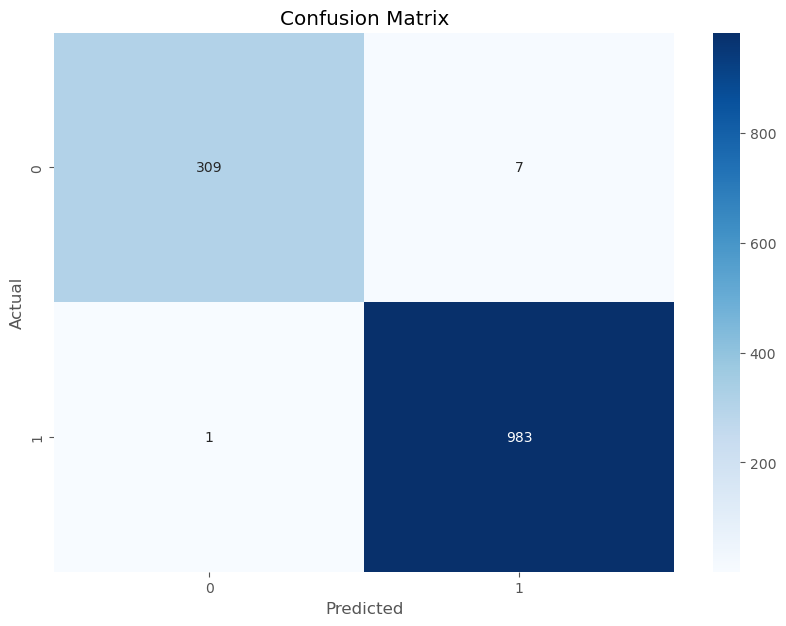

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(cm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gs_svm.classes_, yticklabels=gs_svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

La primera fila y primera columna (309): Verdaderos negativos (TN). Es decir, hay 309 casos donde la clase negativa fue correctamente clasificada como negativa.  
La primera fila y segunda columna (7): Falsos positivos (FP). Esto indica que hay 7 casos donde la clase negativa fue incorrectamente clasificada como positiva.  
La segunda fila y primera columna (1): Falsos negativos (FN). Hay 1 caso donde la clase positiva fue incorrectamente clasificada como negativa.  
La segunda fila y segunda columna (983): Verdaderos positivos (TP). Hay 983 casos donde la clase positiva fue correctamente clasificada como positiva.

In [41]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [ ]:
def metricas(modelo, X, y, umbral=0.5):
    y_pred = np.where(modelo.predict_proba(X)[:, 1] < umbral, 0, 1)
    salida = {}
    salida["recall"] = recall_score(y_true=y, y_pred=y_pred)
    salida["precision"] = precision_score(y_true=y, y_pred=y_pred)
    salida["f1"] = f1_score(y_true=y, y_pred=y_pred)
    salida["accuracy"] = accuracy_score(y_true=y, y_pred=y_pred)
    return salida

In [61]:
metricas(mejor_pipeline,x_test,y_test)

{'recall': 0.9989837398373984,
 'precision': 0.9929292929292929,
 'f1': 0.9959473150962512,
 'accuracy': 0.9938461538461538}

El modelo muestra un rendimiento muy alto:

Alto recall (99.8%): Indica que casi todas las instancias positivas fueron correctamente identificadas.  
Alta precisión (99.3%): Indica que la mayoría de las predicciones positivas son correctas.  
Alta puntuación F1 (99.6%): Indica un excelente equilibrio entre precisión y recall.  
Alta accuracy (99.4%): La gran mayoría de las predicciones, tanto positivas como negativas, son correctas.

In [62]:
for rango in np.arange(0,1,0.1):
  print(rango)
  print(metricas(mejor_pipeline,x_test,y_test,umbral=rango))

0.0
{'recall': 1.0, 'precision': 0.7569230769230769, 'f1': 0.8616462346760071, 'accuracy': 0.7569230769230769}
0.1
{'recall': 0.9989837398373984, 'precision': 0.9899295065458208, 'f1': 0.994436014162873, 'accuracy': 0.9915384615384616}
0.2
{'recall': 0.9989837398373984, 'precision': 0.9909274193548387, 'f1': 0.9949392712550608, 'accuracy': 0.9923076923076923}
0.30000000000000004
{'recall': 0.9989837398373984, 'precision': 0.9929292929292929, 'f1': 0.9959473150962512, 'accuracy': 0.9938461538461538}
0.4
{'recall': 0.9989837398373984, 'precision': 0.9929292929292929, 'f1': 0.9959473150962512, 'accuracy': 0.9938461538461538}
0.5
{'recall': 0.9989837398373984, 'precision': 0.9929292929292929, 'f1': 0.9959473150962512, 'accuracy': 0.9938461538461538}
0.6000000000000001
{'recall': 0.9989837398373984, 'precision': 0.993933265925177, 'f1': 0.9964521033958439, 'accuracy': 0.9946153846153846}
0.7000000000000001
{'recall': 0.9979674796747967, 'precision': 0.9949341438703141, 'f1': 0.9964485032978

En un dataset donde la variable objetivo está desbalanceada, la métrica de exactitud (accuracy) no es la mejor opción para evaluar el rendimiento del modelo. Esto se debe a que un modelo puede tener una alta exactitud simplemente prediciendo la clase mayoritaria, sin captar correctamente las clases minoritarias.  
F1 Score será la métrica que usaremos para fijar un umbral para precedir nuestra variable objetivo. Si tuvieramos un mayor conocimiento vinícola o supiéramos las neceidades del negocio en cuestión, podríamos haber elegido otro umbral que tendiera a aumentar la precisión y a disminuir el recall o al reves. Como no es nuestra situación, elegimos el f1 score, que es la media armónica de la precisión y el recall.  
Vemos que para un umbral de 0.6 nuestro Z1 Score alcanza el valor máximo. 

In [63]:
umbral=0.6
np.where(mejor_pipeline.predict_proba(x_test)[:,1]<umbral,0,1)

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
from sklearn.metrics import roc_curve,roc_auc_score
def draw_roc(model, X, y, titulo="Roc curve", figsize=(15, 10)):
    """
    Function to plot the ROC Curve
    ARgs: A machine learning model, a dataframe with the independent variables (X), a series or colection with the target
    variable (y), the graph title and figsize
    Returns:  A plot with the roc curve
    """

    y_test_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, umbrales = roc_curve(y_true=y
                                   ,
                                   y_score=y_test_proba)  # Aquí se extraen las ratios fpr y tpr que se pintarán después.
    plt.figure(figsize=figsize)
    plt.plot([0, 1], [0, 1], "r--")
    plt.plot(fpr, tpr, "b")
    plt.fill_between(fpr, tpr, alpha=0.2, color="yellow")
    # plt.title(titulo)
    plt.show()
    return roc_auc_score(y_true=y,y_score=y_test_proba) ##bonus

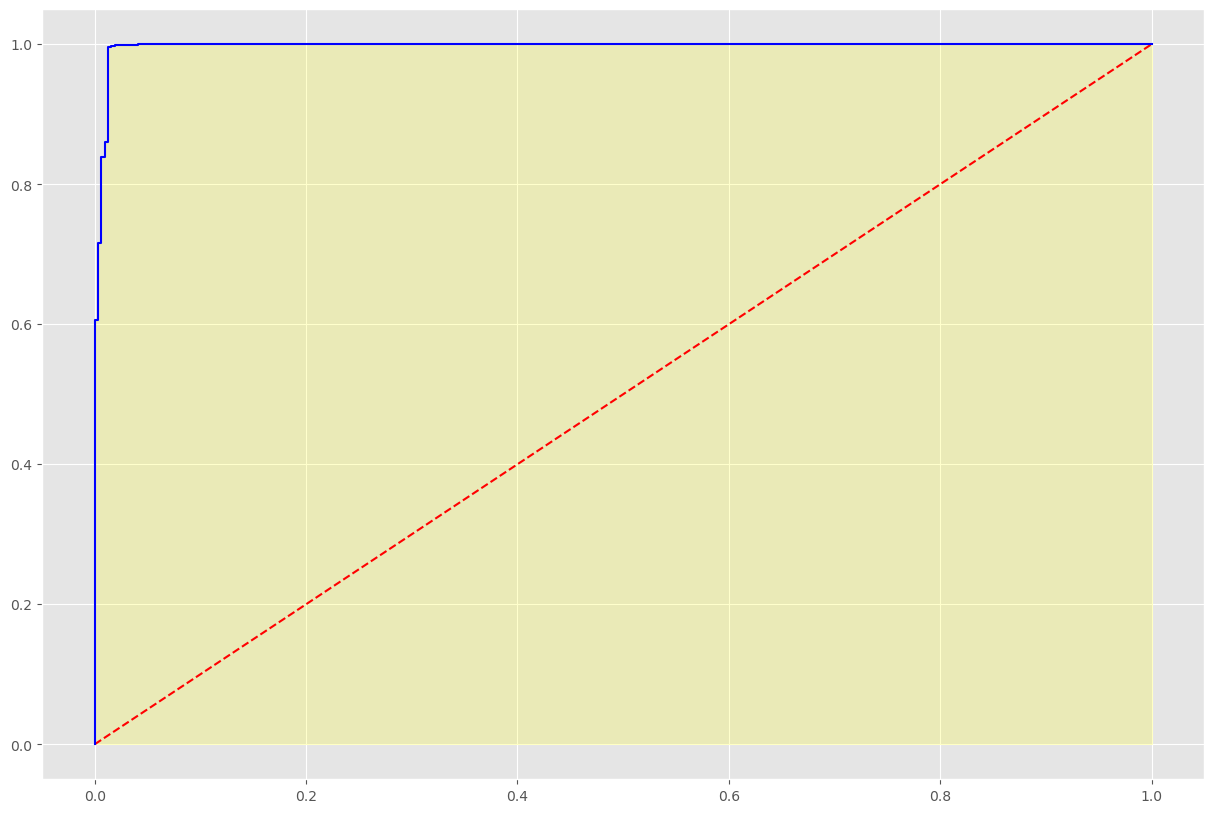

0.9968579551301842

In [65]:
draw_roc(mejor_pipeline,x_test,y_test)

La curva ROC se separa muy pronto del Random Guess, que es la línea roja discontínua, llenando prácticamente todo el área del gráfico. Estamos ante un modelo muy bueno.  
El ROC AUC con un valor de 0.9969 esta muy cerca de cero por lo que este modelo es practicamente perfecto.

## 8. CONCLUSIONES FINALES
En el análisis realizado, se evaluaron varios modelos para predecir la variable objetivo, entre los cuales destacaron aquellos optimizados mediante GridSearchCV, como el Random Forest y el SVM, ambos mostrando métricas de rendimiento sobresalientes. Tras seleccionar el modelo SVM como el mejor, analizamos las métricas y fue con un umbral de 0.6 donde mostró los mejores resultados, con un F1 Score de 0.996. Se observó que la métrica accuracy no es adecuada para datasets desbalanceados, ya que puede inducir a errores interpretativos. Estas conclusiones subrayan la importancia de elegir las métricas adecuadas y ajustadas al contexto del problema, garantizando un modelo robusto y fiable para la predicción de la variable objetivo.